# Introduction

## Feature Description


Age : Age of the patient

Sex : Sex of the patient

exang: exercise induced angina (1 = yes; 0 = no)

ca: number of major vessels (0-3)

cp : Chest Pain type chest pain type

    Value 1: typical angina
    Value 2: atypical angina
    Value 3: non-anginal pain
    Value 4: asymptomatic
    
trtbps : resting blood pressure (in mm Hg)

chol : cholestoral in mg/dl fetched via BMI sensor

fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

rest_ecg : resting electrocardiographic results

    Value 0: normal
    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    
thalach : maximum heart rate achieved

target : 0= less chance of heart attack 1= more chance of heart attack

## Import Libraries

In [119]:
import os
import numpy as np
import pandas as pd

# for visualizations 
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
from yellowbrick.classifier import ClassificationReport


# Exploratory Data Analysis


In [111]:
# load data
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [99]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


heart attack: 54.46%
no heart attack: 45.54%


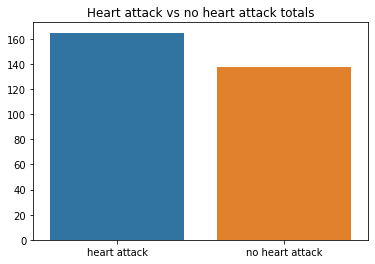

In [100]:
outcome_counts = df["output"].value_counts()
heart_attack = outcome_counts[1]
no_heart_attack = outcome_counts[0]

print("heart attack: {:.2f}%".format(heart_attack/len(df) * 100))
print("no heart attack: {:.2f}%".format(no_heart_attack/len(df) * 100))

sns.barplot(x = ['heart attack', 'no heart attack'], y = [heart_attack, no_heart_attack])
plt.title("Heart attack vs no heart attack totals")
plt.show()


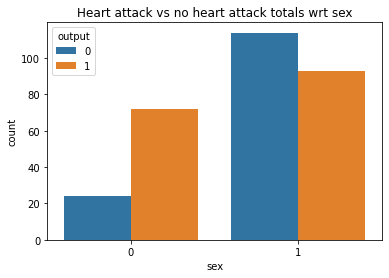

In [101]:
sns.countplot(data=df, x='sex', hue='output')
plt.title("Heart attack vs no heart attack totals wrt sex")
plt.show()

In [102]:
counts_gender = df.groupby('sex')['output'].value_counts()
male_heart_attack_num = counts_gender[1][1]
female_heart_attack_num = counts_gender[0][1]

male_heart_attack_percentage = male_heart_attack_num/(counts_gender[1][1] + counts_gender[1][0])*100
female_heart_attack_percentage = female_heart_attack_num/(counts_gender[0][1] + counts_gender[0][0])*100

print("male heart attack percentage: {:.2f}%".format(male_heart_attack_percentage))
print("female heart attack percentage: {:.2f}%".format(female_heart_attack_percentage))


male heart attack percentage: 44.93%
female heart attack percentage: 75.00%


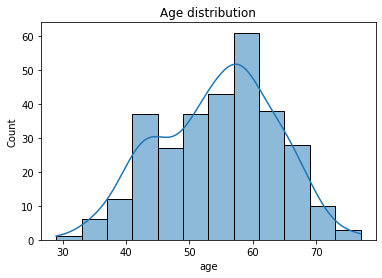

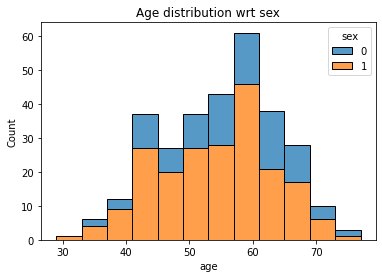

In [103]:
sns.histplot(data=df, x='age', kde=True)
plt.title("Age distribution")
plt.show()

# view sex differences 
sns.histplot(data=df, x='age', hue='sex', multiple="stack")
plt.title("Age distribution wrt sex")
plt.show()


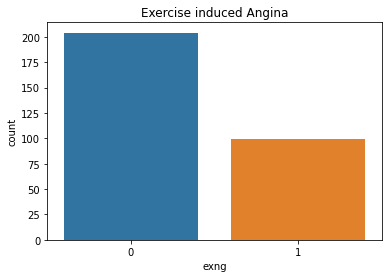

In [104]:
# exercise induced angina distribution 
sns.countplot(data=df, x = 'exng')
plt.title("Exercise induced Angina")
plt.show()


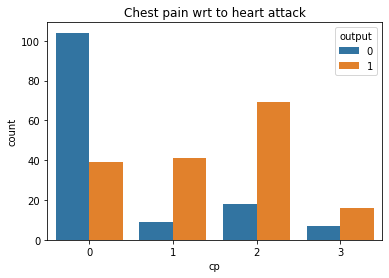

In [105]:
# chest pain type distribution 
sns.countplot(data=df, x = 'cp', hue = 'output')
plt.title("Chest pain wrt to heart attack")
plt.show()

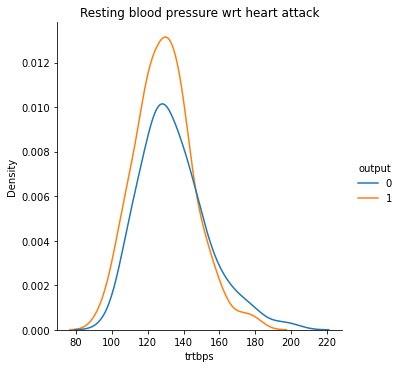

In [106]:
# resting blood pressure wrt Heart attack
sns.displot(data=df, x = 'trtbps', hue='output', kind='kde')
plt.title("Resting blood pressure wrt heart attack")
plt.show()

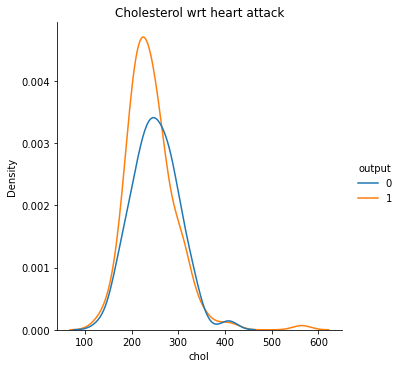

In [107]:
# cholesterol wrt heart attack
sns.displot(data=df, x = 'chol', hue='output', kind='kde')
plt.title("Cholesterol wrt heart attack")
plt.show()

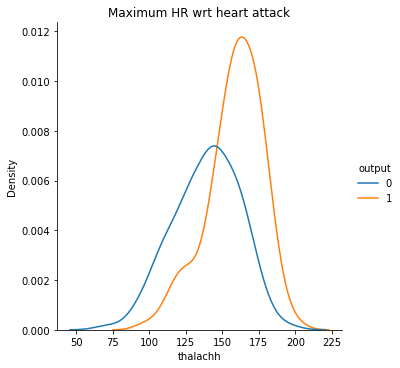

In [108]:
# max heart rate reached wrt to heart attack
sns.displot(data=df, x = 'thalachh', hue='output', kind='kde')
plt.title("Maximum HR wrt heart attack")
plt.show()

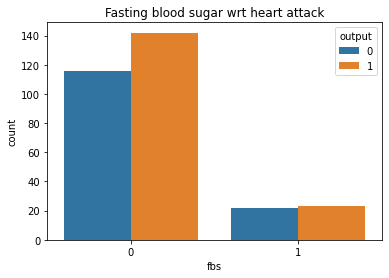

Reminder:
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)


In [109]:
# fasting blood sugar wrt Heart Attack
sns.countplot(data=df, x = 'fbs', hue='output')
plt.title("Fasting blood sugar wrt heart attack")
plt.show()
print("Reminder:\nfbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)")

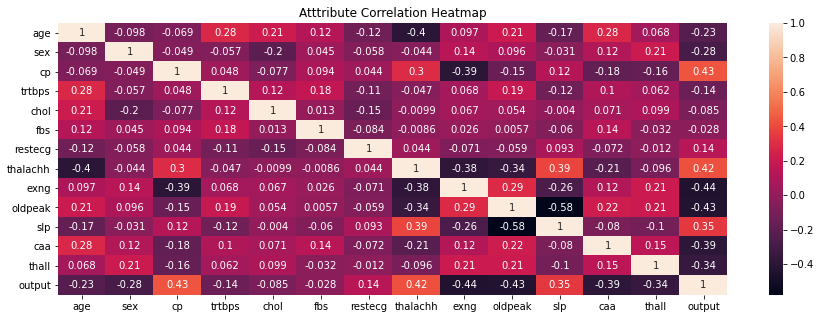

In [110]:
# correlation matrix
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True)
plt.title("Atttribute Correlation Heatmap")
plt.show()

# Modeling

In [121]:
# split data
target = df['output']
features = df.drop('output', axis=1)
features = features.drop('slp', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,2
2,41,0,1,130,204,0,0,172,0,1.4,0,2
3,56,1,1,120,236,0,1,178,0,0.8,0,2
4,57,0,0,120,354,0,1,163,1,0.6,0,2


In [ ]:
# Standardize data

## Model Testing

In [ ]:
# function for training/testing models also generates a report



## Model Comparison

In [ ]:
# function for comparing each model with visualizations


# Conclusion

REFERENCES:

1. https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset